In [1]:
# Copyright 2023 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Getting Started with the Vertex AI PaLM API & Python SDK

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/language/intro_palm_api.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Colab logo"> Run in Colab
    </a>
  </td>
  <td>
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/language/intro_palm_api.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo">
      View on GitHub
    </a>
  </td>
  <td>
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/blob/main/language/intro_palm_api.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo">
      Open in Vertex AI Workbench
    </a>
  </td>
</table>

## Overview

### What are LLMs?
Large language models (LLMs) are deep learning models trained on massive datasets of text. LLMs can translate language, summarize text, generate creative writing, generate code, power chatbots and virtual assistants, and complement search engines and recommendation systems. 

### PaLM
Following its predecessor, [PaLM](https://ai.googleblog.com/2022/04/pathways-language-model-palm-scaling-to.html), [PaLM 2](https://ai.google/discover/palm2) is Google's next generation large language model that builds on Google’s legacy of breakthrough research in machine learning and responsible AI. PaLM 2 excels at tasks like advanced reasoning, translation, and code generation because of how it was built. 

PaLM 2 [excels](https://ai.google/static/documents/palm2techreport.pdf) at advanced reasoning tasks, including code and math, classification and question answering, translation and multilingual proficiency, and natural language generation better than our previous state-of-the-art LLMs, including PaLM. It can accomplish these tasks because of the way it was built – bringing together compute-optimal scaling, an improved dataset mixture, and model architecture improvements.

PaLM 2 is grounded in Google’s approach to building and deploying AI responsibly. It was evaluated rigorously for its potential harms and biases, capabilities and downstream uses in research and in-product applications. It’s being used in other state-of-the-art models, like Med-PaLM 2 and Sec-PaLM, and is powering generative AI features and tools at Google, like Bard and the PaLM API.

PaLM is pre-trained on a wide range of text data using an unsupervised learning approach, without any specific task. During this pre-training process, PaLM learns to predict the next word in a sentence, given the preceding words. This enables the model to generate coherent, fluent text resembling human writing.
This large size enables it to learn complex patterns and relationships in language and generate high-quality text for various applications. This is why models like PaLM are referred to as "foundational models."

Creating an LLM requires massive amounts of data, significant compute resources, and specialized skills. Because LLMs require a big investment to create, they target broad rather than specific use cases. On Vertex AI, you can customize a foundation model for more specific tasks or knowledge domains by using prompt design and model tuning.

### Vertex AI PaLM API
The Vertex AI PaLM API, [released on May 10, 2023](https://cloud.google.com/vertex-ai/docs/generative-ai/release-notes#may_10_2023), is powered by [PaLM 2](https://ai.google/discover/palm2).

### Using Vertex AI PaLM API

You can interact with the Vertex AI PaLM API using the following methods:

* Use the [Generative AI Studio](https://cloud.google.com/generative-ai-studio) for quick testing and command generation.
* Use cURL commands in Cloud Shell.
* Use the Python SDK in a Jupyter notebook

This notebook focuses on using the Python SDK to call the Vertex AI PaLM API. For more information on using Generative AI Studio without writing code, you can explore [Getting Started with the UI instructions](https://github.com/GoogleCloudPlatform/generative-ai/blob/main/getting-started/getting_started_ui.md)


For more information, check out the [documentation on generative AI support for Vertex AI](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/overview).

### Objectives

In this tutorial, you will learn how to use PaLM API with the Python SDK and explore its various parameters.

By the end of the notebook, you should be able to understand various nuances of generative model parameters like `temperature`, `top_k`, `top_p`, and how each parameter affects the results.

The steps performed include:

- Installing the Python SDK 
- Using Vertex AI PaLM API
  - Text generation model with `text-bison@001`
    - Understanding model parameters (`temperature`, `max_output_token`,  `top_k`, `top_p`)
  - Chat model with `chat-bison@001`
  - Embeddings model with `textembedding-gecko@001`
  

### Costs
This tutorial uses billable components of Google Cloud:

* Vertex AI Generative AI Studio

Learn about [Vertex AI pricing](https://cloud.google.com/vertex-ai/pricing),
and use the [Pricing Calculator](https://cloud.google.com/products/calculator/)
to generate a cost estimate based on your projected usage.

### Data security
**Q: Does Google use customer data to improve its foundation models?**  
A: No, Google does not use customer data to improve foundation models. Customer data is only used to generate a response from the model.

**Q: Do Google employees see data that I submit to the model?**  
A: No, Google employees have no access to customer data and all data is encrypted in-transit, in-use, and at-rest. 

**Q: Does Google store any of the customer data that is sent to the model?**  
A: No, Google does not store customer data. However, Google may temporarily cache customer data for the duration of the request, such as prompt tuning pipeline and batch prediction. 

**Q: Does Google log data?**  
A: No, Google does not log customer data. System-level logs help Google ensure system health and availability.

### Responsible AI
Large language models (LLMs) can translate language, summarize text, generate creative writing, generate code, power chatbots and virtual assistants, and complement search engines and recommendation systems. At the same time, as an early-stage technology, its evolving capabilities and uses create potential for misapplication, misuse, and unintended or unforeseen consequences. Large language models can generate output that you don't expect, including text that's offensive, insensitive, or factually incorrect.

What's more, the incredible versatility of LLMs is also what makes it difficult to predict exactly what kinds of unintended or unforeseen outputs they might produce. Given these risks and complexities, the PaLM API is designed with [Google's AI Principles](https://ai.google/principles/) in mind. However, it is important for developers to understand and test their models to deploy safely and responsibly. To aid developers, the Generative AI Studio has built-in content filtering, and the PaLM API has safety attribute scoring to help customers test Google's safety filters and define confidence thresholds that are right for their use case and business. Please refer to the [Safety filters and attributes](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/responsible-ai#safety_filters_and_attributes) section to learn more.

When the PaLM API is integrated into a customer's unique use case and context, additional responsible AI considerations and [PaLM limitations](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/responsible-ai#palm_limitations) may need to be considered. We encourage customers to leverage fairness, interpretability, privacy and security [recommended practices](https://ai.google/responsibilities/responsible-ai-practices/).

## Getting Started

### Install Vertex AI and Cloud Translate API SDK

In [2]:
!pip install google-cloud-aiplatform google-cloud-translate --upgrade --user

**Colab only:** Uncomment the following cell to restart the kernel or use the button to restart the kernel. For Vertex AI Workbench you can restart the terminal using the button on top. 

In [3]:
# # Automatically restart kernel after installs so that your environment can access the new packages
# import IPython

# app = IPython.Application.instance()
# app.kernel.do_shutdown(True)

### Authenticating your notebook environment
* If you are using **Colab** to run this notebook, uncomment the cell below and continue.
* If you are using **Vertex AI Workbench**, check out the setup instructions [here](https://github.com/GoogleCloudPlatform/generative-ai/tree/main/setup-env).

In [4]:
# from google.colab import auth
# auth.authenticate_user()

## Vertex AI PaLM API models

The Vertex AI PaLM API enables you to test, customize, and deploy instances of Google’s large language models (LLM) called as PaLM,  so that you can leverage the capabilities of PaLM in your applications.

### Model naming scheme
Foundation model names have three components: use case, model size, and version number. The naming convention is in the format:  
`<use case>-<model size>@<version number>`

For example, text-bison@001 represents the Bison text model, version 001.

The model sizes are as follows:
- **Bison**: The best value in terms of capability and cost.
- **Gecko**: The smallest and cheapest model for simple tasks.

### Available models

The Vertex AI PaLM API currently supports three models:

*   `text-bison@001` : Fine-tuned to follow natural language instructions and is suitable for a variety of language tasks.
*   `chat-bison@001` : Fine-tuned for multi-turn conversation use cases like building a chatbot.
*   `textembedding-gecko@001` : Returns model embeddings for text inputs.

You can find more information about the properties of these [foundational models in the Generative AI Studio documentation](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#foundation_models).


### Import libraries

**Colab only:** Uncomment the following cell to initialize the Vertex AI SDK. For Vertex AI Workbench, you don't need to run this.  

In [5]:
# import vertexai

# PROJECT_ID = "[your-project-id]"  # @param {type:"string"}
# vertexai.init(project=PROJECT_ID, location="us-central1")

In [6]:
import pandas as pd
import seaborn as sns
from IPython.display import Markdown, display
from sklearn.metrics.pairwise import cosine_similarity
from vertexai.preview.language_models import (ChatModel, InputOutputTextPair,
                                              TextEmbeddingModel,
                                              TextGenerationModel)

## Text generation with `text-bison@001`

The text generation model from PaLM API that you will use in this notebook is `text-bison@001`.
It is fine-tuned to follow natural language instructions and is suitable for a variety of language tasks, such as:

- Classification
- Sentiment analysis
- Entity extraction
- Extractive question-answering
- Summarization
- Re-writing text in a different style
- Ad copy generation
- Concept ideation
- Concept simplification

#### Load model

In [7]:
generation_model = TextGenerationModel.from_pretrained("text-bison@001")

#### Create the translation wrapper function

In [8]:
from google.cloud import translate

project_id = !gcloud config list project
project_id = project_id[1].split('=')[1].strip()
parent = f'projects/' + project_id


def traduza(texto, idioma_destino):
    client = translate.TranslationServiceClient()

    response = client.translate_text(
        parent=parent,
        contents=[texto],
        target_language_code=idioma_destino,
        mime_type="text/plain"
    )

    return response.translations[0].translated_text

#### Prompt design
Prompt design is the process of creating prompts that elicit the desired response from a language model. Prompt design is an important part of using language models because it allows non-specialists to control the output of the model with minimal overhead. By carefully crafting the prompts, you can nudge the model to generate a desired result. Prompt design can be an efficient way to experiment with adapting an LLM for a specific use case. The iterative process of repeatedly updating prompts and assessing the model’s responses is sometimes called prompt engineering.

#### Hello PaLM

Create your first prompt and send it to the text generation model.

In [9]:
prompt = traduza("O que é um large language model?", "en")

response = generation_model.predict(prompt=prompt)

print(traduza(response.text, "pt"))

Um grande modelo de linguagem (LLM) é um tipo de modelo de inteligência artificial (IA) que pode entender e gerar a linguagem humana. Os LLMs são treinados em grandes conjuntos de dados de texto e código e podem aprender a realizar uma ampla variedade de tarefas, como traduzir idiomas, escrever diferentes tipos de conteúdo criativo e responder às suas perguntas de maneira informativa.

Os LLMs ainda estão em desenvolvimento, mas têm o potencial de revolucionar muitos setores. Por exemplo, os LLMs podem ser usados ​​para criar experiências de atendimento ao cliente mais precisas e personalizadas, para ajudar os médicos a diagnosticar e tratar doenças e até mesmo para escrever livros e filmes inteiros.




#### Try out your own prompt

- What are the top 10 trends in the tech industry?
- What are the biggest challenges facing the healthcare industry?
- What are the latest developments in the automotive industry?
- What are the biggest opportunities in the retail industry?
- (Try your own prompts!)

In [10]:
prompt = traduza("Quais são as top-10 tendências para computação?", "en") # try your own prompt

response = generation_model.predict(prompt=prompt)

print(traduza(response.text, "pt"))

1. Inteligência artificial (IA)
2. Aprendizado de máquina (ML)
3. Aprendizado profundo (DL)
4. Processamento de linguagem natural (PNL)
5. Visão computacional (CV)
6. Robótica
7. Computação quântica
8. Blockchain
9. 5G
10. A Internet das Coisas (IoT)


#### Prompt templates

Prompt templates are useful if you have found a good way to structure your prompt that you can re-use. This can be also be helpful in limiting the open-endedness of freeform prompts. There are many ways to implement prompt templates, and below is just one example using f-strings.

In [11]:
minha_industria = "esportes" # try changing this to a different industry

response = generation_model.predict(
    prompt=traduza("Quais são as top-10 tendências para " + minha_industria + "?", "en")
)

print(traduza(response.text, "pt"))

1. O crescimento dos esportes eletrônicos.
2. A crescente popularidade dos esportes femininos.
3. A ascensão das mídias sociais nos esportes.
4. O uso da tecnologia para melhorar o desempenho.
5. O foco na saúde e bem-estar no esporte.
6. A tendência para a especialização desportiva.
7. A crescente comercialização dos esportes.
8. A importância crescente do turismo desportivo.
9. A necessidade de mais diversidade nos esportes.
10. Os desafios das mudanças climáticas para o esporte.


### Model parameters for `text-bison@001`

You can customize how the PaLM API behaves in response to your prompt by using the following parameters for `text-bison@001`:

 - `temperature`: higher means more "creative" responses
 - `max_output_tokens`: sets the max number of tokens in the output
 - `top_p`: higher means it will pull from more possible next tokens, based on cumulative probability
 - `top_k`: higher means it will sample from more possible next tokens
 
The section below covers each parameter and how to use them.

#### The `temperature` parameter (range: 0.0 - 1.0, default 0)

##### What is _temperature_?
The temperature is used for sampling during the response generation, which occurs when top_p and top_k are applied. Temperature controls the degree of randomness in token selection.

##### How does _temperature_ affect the response?
Lower temperatures are good for prompts that require a more deterministic and less open-ended response. In comparison, higher temperatures can lead to more "creative" or diverse results. A temperature of `0` is deterministic: the highest probability response is always selected. For most use cases, try starting with a temperature of `0.2`.

A higher temperature value will result in a more exploratative output, with a higher likelihood of generating rare or unusual words or phrases. Conversely, a lower temperature value will result in a more conservative output, with a higher likelihood of generating common or expected words or phrases.

##### Example:

For example,

`temperature = 0.0`:

* _The cat sat on the couch, watching the birds outside._
* _The cat sat on the windowsill, basking in the sun._

`temperature = 0.9`:

* _The cat sat on the moon, meowing at the stars._
* _The cat sat on the cheeseburger, purring with delight._

**Note**: It's important to note that while the temperature parameter can help generate more diverse and interesting text, it can also increase the likelihood of generating nonsensical or inappropriate text (i.e. hallucinations). Therefore, it's important to use it carefully and with consideration for the desired outcome.

For more information on the `temperature` parameter for text models, please refer to the [documentation on model parameters](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#text_model_parameters).

If you run the following cell multiple times, it should always return the same response, as `temperature=0` is deterministic.

In [12]:
temp_val = 0.0
prompt_temperature = traduza("Complete a frase: Enquanto me preparava para pendurar o quadro, peguei na caixa de ferramentas um:", "en")

response = generation_model.predict(
    prompt=prompt_temperature,
    temperature=temp_val,
)

print(f"[temperature = {temp_val}]")
print(traduza(response.text, "pt"))

[temperature = 0.0]
Enquanto me preparava para pendurar o quadro, tirei da caixa de ferramentas um: martelo.


If you run the following cell multiple times, it may return different responses, as higher temperature values can lead to more diverse results, even though the prompt is the same as the above cell.

In [13]:
temp_val = 1.0

response = generation_model.predict(
    prompt=prompt_temperature,
    temperature=temp_val,
)

print(f"[temperature = {temp_val}]")
print(traduza(response.text, "pt"))

[temperature = 1.0]
cabide.


#### The `max_output_tokens` parameter (range: 1 - 1024, default 128)

##### Tokens
A single token may be smaller than a word. For example, a token is approximately four characters. So 100 tokens correspond to roughly 60-80 words. It's essential to be aware of the token sizes as models have a limit on input and output tokens.

##### What is _max_output_tokens_?
`max_output_tokens` is the maximum number of tokens that can be generated in the response.

##### How does _max_output_tokens_ affect the response?

Specify a lower value for shorter responses and a higher value for longer responses. A token may be smaller than a word. A token is approximately four characters. 100 tokens correspond to roughly 60-80 words.

For more information on the `max_output_tokens` parameter for text models, please refer to the [documentation on model parameters](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#text_model_parameters).

In [14]:
max_output_tokens_val = 5

response = generation_model.predict(
    prompt=traduza("Liste 10 formas que a Generative AI pode auxiliar na experiência de compras online dos usuários", "en"),
    max_output_tokens=max_output_tokens_val,
)

print(f"[max_output_tokens = {max_output_tokens_val}]")
print(traduza(response.text, "pt"))

[max_output_tokens = 5]
1. **Pessoal


In [15]:
max_output_tokens_val = 500

response = generation_model.predict(
    prompt=traduza("Liste 10 formas que a Generative AI pode auxiliar na experiência de compras online dos usuários", "en"),
    max_output_tokens=max_output_tokens_val,
)

print(f"[max_output_tokens = {max_output_tokens_val}]")
print(traduza(response.text, "pt"))

[max_output_tokens = 500]
1. **Recomendações personalizadas.** A IA generativa pode usar o histórico de compras anteriores, o histórico de navegação e outros dados de um usuário para gerar recomendações personalizadas de produtos nos quais eles possam se interessar. Isso pode ajudar os usuários a encontrar produtos que não teriam encontrado de outra forma, e também pode ajudá-los a economizar tempo e dinheiro.
2. **Teste virtual.** A IA generativa pode ser usada para criar modelos virtuais realistas de produtos, que podem permitir que os usuários experimentem roupas, maquiagem e outros produtos antes de comprá-los. Isso pode ajudar os usuários a tomar decisões mais informadas sobre suas compras e também pode ajudá-los a evitar a compra de produtos que não se encaixam ou não ficam bem neles.
3. **Realidade aumentada.** A IA generativa pode ser usada para criar experiências de realidade aumentada que permitem aos usuários ver como os produtos ficariam em suas casas ou em seus corpos. Ess

For easier reading, you can also render Markdown in Jupyter:

In [16]:
display(Markdown(traduza(response.text, "pt")))

1. **Recomendações personalizadas.** A IA generativa pode usar o histórico de compras anteriores, o histórico de navegação e outros dados de um usuário para gerar recomendações personalizadas de produtos nos quais eles possam se interessar. Isso pode ajudar os usuários a encontrar produtos que não teriam encontrado de outra forma, e também pode ajudá-los a economizar tempo e dinheiro.
2. **Teste virtual.** A IA generativa pode ser usada para criar modelos virtuais realistas de produtos, que podem permitir que os usuários experimentem roupas, maquiagem e outros produtos antes de comprá-los. Isso pode ajudar os usuários a tomar decisões mais informadas sobre suas compras e também pode ajudá-los a evitar a compra de produtos que não se encaixam ou não ficam bem neles.
3. **Realidade aumentada.** A IA generativa pode ser usada para criar experiências de realidade aumentada que permitem aos usuários ver como os produtos ficariam em suas casas ou em seus corpos. Essa pode ser uma maneira útil para os usuários visualizarem os produtos antes de comprá-los e também pode ajudá-los a tomar decisões mais informadas sobre suas compras.
4. **Tradução em tempo real.** A IA generativa pode ser usada para traduzir texto e fala em tempo real, o que pode ser uma maneira útil para os usuários comprarem em outros idiomas. Isso pode ser especialmente útil para usuários que estão viajando ou comprando em sites que não estão em seu idioma nativo.
5. **Geração de imagens.** A IA generativa pode ser usada para criar imagens realistas de produtos, que podem ser usadas para fins de marketing ou para ajudar os usuários a visualizar os produtos antes de comprá-los. Essa pode ser uma maneira mais eficaz de comercializar produtos do que usar imagens de estoque e também pode ajudar os usuários a tomar decisões mais informadas sobre suas compras.
6. **Geração de vídeo.** A IA generativa pode ser usada para criar vídeos realistas de produtos, que podem ser usados ​​para fins de marketing ou para ajudar os usuários a visualizar os produtos antes de comprá-los. Essa pode ser uma maneira mais eficaz de comercializar produtos do que usar vídeos de estoque e também pode ajudar os usuários a tomar decisões mais informadas sobre suas compras.
7. **Chatbots.** Generative AI pode ser usado para criar chatbots que podem responder às perguntas dos usuários sobre produtos e ajudá-los a concluir suas compras. Essa pode ser uma maneira útil para os usuários obterem ajuda quando precisarem e também pode ajudá-los a economizar tempo e dinheiro.
8. **Atendimento ao cliente.** A IA generativa pode ser usada para fornecer suporte ao atendimento ao cliente, como responder a perguntas sobre produtos, resolver reclamações e

#### The `top_p` parameter (range: 0.0 - 1.0, default 0.95)

##### What is _top_p_?
`top_p` controls how the model selects tokens for output by adjusting the probability distribution of the next word in the generated text based on a cumulative probability cutoff. Specifically, it selects the smallest set of tokens whose cumulative probability exceeds the given cutoff probability _p_, and samples from this set uniformly.


For example, suppose tokens A, B, and C have a probability of 0.3, 0.2, and 0.1, and the `top_p` value is 0.5. In that case, the model will select either A or B as the next token (using temperature) and not consider C, because the cumulative probability of top_p is <= 0.5. Specify a lower value for less random responses and a higher value for more random responses.

##### How does _top_p_ affect the response?

The `top_p` parameter is used to control the diversity of the generated text. A higher `top_p` parameter value results in more "diverse" and "interesting" outputs, with the model being allowed to sample from a larger pool of possibilities. In contrast, a lower `top_p` parameter value resulted in more predictable outputs, with the model being constrained to a smaller set of possible tokens.


##### Example:

`top_p = 0.1`:

- The cat sat on the mat.
- The cat sat on the floor.

`top_p = 0.9`:

- The cat sat on the windowsill, soaking up the sun's rays.
- The cat sat on the edge of the bed, watching the birds outside.

For more information on the `top_p` parameter for text models, please refer to the [documentation on model parameters](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#text_model_parameters).

In [17]:
top_p_val = 0.0
prompt_top_p_example = (
    traduza("Crie uma campanha de marketing para jaquetas jeans que involva elefantes azuis e abacates", "en")
)

response = generation_model.predict(
    prompt=prompt_top_p_example, temperature=0.9, top_p=top_p_val
)

print(f"[top_p = {top_p_val}]")
print(traduza(response.text, "pt"))

[top_p = 0.0]
**Apresentando a nova jaqueta jeans que vai chamar a atenção.**

Esta jaqueta elegante é feita de jeans 100% algodão e apresenta um ajuste relaxado. É perfeito para qualquer ocasião, desde uma noite na cidade até um dia na praia.

Mas o que realmente diferencia esta jaqueta é a estampa única de elefante azul e abacate. Este design atraente certamente fará você ser notado e certamente fará você sorrir.

Então, o que você está esperando? Encomende sua nova jaqueta jeans hoje!

** Aqui estão alguns dos benefícios da nossa jaqueta jeans


In [18]:
top_p_val = 1.0

response = generation_model.predict(
    prompt=prompt_top_p_example, temperature=0.9, top_p=top_p_val
)

print(f"[top_p = {top_p_val}]")
print(traduza(response.text, "pt"))

[top_p = 1.0]
**Apresentando a nova jaqueta jeans que está chamando a atenção em todos os lugares.**

Esta não é uma jaqueta jeans comum. É feito de um tecido macio e leve que é perfeito para qualquer estação. E a cor? Um azul vibrante que vai fazer você se destacar da multidão.

Mas o que realmente diferencia esta jaqueta é o elefante bordado e o patch de abacate. Este design lúdico certamente fará com que você seja notado e é um ótimo começo de conversa.

**Então, o que você está esperando? Peça o seu hoje!**

**Aqui estão alguns dos benefícios da nossa jaqueta jeans:**



#### The `top_k` parameter (range: 0.0 - 40, default 40)

##### What is _top_k_?
`top_k` changes how the model selects tokens for output. A `top_k` of 1 means the selected token is the most probable among all tokens in the model's vocabulary (also called greedy decoding). In contrast, a `top_k` of 3 means that the next token is selected from the top 3 most probable tokens (using temperature). For each token selection step, the `top_k` tokens with the highest probabilities are sampled. Then tokens are further filtered based on `top_p` with the final token selected using temperature sampling.

##### How does _top_k_ affect the response?

Specify a lower value for less random responses and a higher value for more random responses.

For more information on the `top_k` parameter for text models, please refer to the [documentation on model parameters](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#text_model_parameters).

In [19]:
prompt_top_k_example = "Escreva um itinerário de 2 dias em Paris"
top_k_val = 1

response = generation_model.predict(
    prompt=traduza(prompt_top_k_example, "en"), 
    max_output_tokens=300, 
    temperature=0.9, 
    top_k=top_k_val
)

print(f"[top_k = {top_k_val}]")
print(traduza(response.text, "pt"))

[top_k = 1]
Dia 1:
* Manhã: Comece o dia com uma visita à Torre Eiffel. Você pode pegar o elevador até o topo para ter uma vista deslumbrante da cidade ou admirá-la de baixo.
* Tarde: Após o almoço, siga para o Museu do Louvre. Este museu mundialmente famoso abriga algumas das obras de arte mais icônicas do mundo, incluindo a Mona Lisa e a Vênus de Milo.
* Noite: desfrute de um jantar romântico em um aconchegante bistrô em Montmartre. Este charmoso bairro é conhecido por suas ruas sinuosas, cafés e artistas.

Dia 2:
* Manhã: Visita ao Palácio de Versalhes. Esta antiga residência real é um Patrimônio Mundial da UNESCO e um dos destinos turísticos mais populares da França.
* Tarde: Passeio pelos Jardins das Tulherias. Estes belos jardins estão localizados ao lado do Museu do Louvre e oferecem um refúgio tranquilo da cidade.
* Noite: Desfrute de um show no Moulin Rouge. Este cabaré mundialmente famoso é imperdível para qualquer visitante de Paris.


In [20]:
top_k_val = 40

response = generation_model.predict(
    prompt=traduza(prompt_top_k_example, "en"),
    max_output_tokens=300,
    temperature=0.9,
    top_k=top_k_val
)

print(f"[top_k = {top_k_val}]")
print(traduza(response.text, "pt"))

[top_k = 40]
**Dia 1:**

* Manhã: Comece o dia no bairro de Marais, um bairro charmoso com ruas de paralelepípedos, pátios escondidos e muitas lojas e restaurantes. Visite a Place des Vosges, uma bela praça com um parque no centro.
* Tarde: À tarde, dirija-se ao Museu do Louvre, um dos maiores e mais famosos museus do mundo. Veja a Mona Lisa, a Vênus de Milo e outras obras de arte icônicas.
* Noite: Para o jantar, dirija-se a um tradicional bistrô francês em Montmartre. Desfrute de uma deliciosa refeição e observe as pessoas enquanto o sol se põe sobre a cidade.

**Dia 2:**

* Manhã: Pela manhã, visite a Torre Eiffel, um dos marcos mais emblemáticos do mundo. Pegue o elevador até o topo para ter uma vista deslumbrante de Paris.
* Tarde: À tarde, explore a Champs-Élysées, uma famosa avenida repleta de lojas, restaurantes e cafés. Pare para tomar uma bebida em um dos muitos cafés na calçada e observe as pessoas.
* Noite: Para jantar, dirija-se a um restaurante com vista para a Torre Eiff

## Chat model with `chat-bison@001`

The `chat-bison@001` model lets you have a freeform conversation across multiple turns. The application tracks what was previously said in the conversation. As such, if you expect to use conversations in your application, use the `chat-bison@001` model because it has been fine-tuned for multi-turn conversation use cases.

In [33]:
chat_model = ChatModel.from_pretrained("chat-bison@001")

chat = chat_model.start_chat()

print(traduza(chat.send_message(
        traduza("""Olá! Escreva um texto em três parágrafos curtos para um artigo científico que eu preciso escrever sobre os impactos da IA Generativa para a sociedade?""", "en")
    ).text,  "pt"))

Generative AI (GAN) é um tipo de aprendizado de máquina que usa redes neurais artificiais para criar conteúdo novo e original. Tem o potencial de revolucionar muitas indústrias, desde a saúde até a arte e a publicidade.

Um dos impactos mais significativos das GANs está na forma como criamos e consumimos mídia. As GANs podem ser usadas para gerar imagens, vídeos e áudio realistas, que podem ser usados ​​para criar novas formas de entretenimento, educação e publicidade. Por exemplo, os GANs foram usados ​​para criar vídeos de notícias falsas de aparência realista, que podem ser usados ​​para espalhar desinformação e propaganda.

As GANs também podem ser usadas para


As shown below, the model should respond based on what was previously said in the conversation:

In [34]:
print(traduza(chat.send_message(
        traduza("""Quais seriam três possíveis títulos interessantes para este artigo?""", "en")
    ).text, "pt"))

* O futuro da IA ​​generativa
* Como a IA generativa está mudando o mundo
* O impacto da IA ​​generativa na sociedade


### Advanced Chat model with the SDK
You can also provide a `context` and `examples` to the model. The model will then respond based on the provided context and examples. You can also use `temperature`, `max_output_tokens`, `top_p`, and `top_k`. These parameters should be used when you start your chat with `chat_model.start_chat()`.

For more information on chat models, please refer to the [documentation on chat model parameters](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#chat_model_parameters).

In [23]:
chat = chat_model.start_chat(
    context=traduza("Meu nome é José. Você é meu assistente pessoal. Meus filmes preferidos são Senhor dos Anéis e o Hobbit.", "en"),
    examples=[
        InputOutputTextPair(
            input_text=traduza("Para quem você trabalha?", "en"),
            output_text=traduza("Eu trabalho para José.", "en")
        ),
        InputOutputTextPair(
            input_text=traduza("Do que eu gosto?", "en"),
            output_text=traduza("José gosta de assistir filmes.", "en")
        ),
    ],
    temperature=0.3,
    max_output_tokens=200,
    top_p=0.8,
    top_k=40,
)
resposta = chat.send_message(traduza("Os meus filmes favoritos são baseados em livros?", "en"))
print(traduza(resposta.text, "pt"))

Sim, O Senhor dos Anéis e O Hobbit são baseados em livros.


In [24]:
resposta = chat.send_message(traduza("Quando eles foram publicados?", "en"))
print(traduza(resposta.text, "pt"))

O Senhor dos Anéis foi publicado em 1954 e O Hobbit foi publicado em 1937.


## Embedding model with `textembedding-gecko@001`

Text embeddings are a dense, often low-dimensional, vector representation of a piece of content such that, if two pieces of content are semantically similar, their respective embeddings are located near each other in the embedding vector space. This representation can be used to solve common NLP tasks, such as:

* **Semantic search**: Search text ranked by semantic similarity.
* **Recommendation**: Return items with text attributes similar to the given text.
* **Classification**: Return the class of items whose text attributes are similar to the given text.
* **Clustering**: Cluster items whose text attributes are similar to the given text.
* **Outlier Detection**: Return items where text attributes are least related to the given text.

Please refer to the [text embedding model documentation](https://cloud.google.com/vertex-ai/docs/generative-ai/embeddings/get-text-embeddings) for more information.

In [25]:
embedding_model = TextEmbeddingModel.from_pretrained("textembedding-gecko@001")

embeddings = embedding_model.get_embeddings([traduza("O que é a vida?", "en")])

for embedding in embeddings:
    vector = embedding.values
    print(f"Length = {len(vector)}")
    print(vector)

Length = 768
[0.010562753304839134, 0.04915031045675278, -0.022224493324756622, 0.0208794716745615, 0.024389723315835, 0.010366306640207767, 0.023919280618429184, 0.022391626611351967, -0.031569067388772964, 0.023535897955298424, -0.017047161236405373, -0.014345862902700901, 0.044956106692552567, 0.027327297255396843, -0.03314697742462158, -0.028214626014232635, -0.035373710095882416, -0.05229683220386505, 0.017105583101511, -0.03780610114336014, -0.07891207933425903, -0.01173518318682909, -0.01629730500280857, -0.04353305324912071, 0.013023999519646168, -0.10904901474714279, -0.0341256819665432, -0.0025329082272946835, -0.036971937865018845, -0.027775181457400322, 0.02332289144396782, 0.0052000475116074085, 0.005503748077899218, 0.0047489493153989315, -0.029920609667897224, 0.07563772797584534, 0.0007565636187791824, 0.03501711040735245, 0.02154686115682125, -0.000812096637673676, 0.06169590726494789, -0.024313345551490784, 0.03736764192581177, -0.0005869767046533525, -0.0228724572807

#### Embeddings and Pandas DataFrames

If your text is stored in a column of a DataFrame, you can create a new column with the embeddings with the example below.

In [26]:
text = [
    "eu realmente curti o filme de ontem a noite",
    "assistimos muitas cenas acrobáticas ontem",
    "eu me diverti escrevendo o meu primeiro programa em Python",
    "uma tremenda sensação de alívio ao finalmente fazer meus scripts Nodejs rodarem sem erros!",
    "Oh Romeu, Romeu, porque es tu Romeu?"
]

df = pd.DataFrame(text, columns=["text"])
df

,text
0,eu realmente curti o filme de ontem a noite
1,assistimos muitas cenas acrobáticas ontem
2,eu me diverti escrevendo o meu primeiro progra...
3,uma tremenda sensação de alívio ao finalmente ...
4,"Oh Romeu, Romeu, porque es tu Romeu?"


Create a new column, `embeddings`, using the [apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) function in pandas with the embeddings model.

In [27]:
df["embeddings"] = [
    emb.values for emb in embedding_model.get_embeddings(df.text.values)
]
df

,text,embeddings
0,eu realmente curti o filme de ontem a noite,"[-0.0292018074542284, -0.013355548493564129, 0..."
1,assistimos muitas cenas acrobáticas ontem,"[-0.07582987844944, -0.03487563878297806, -0.0..."
2,eu me diverti escrevendo o meu primeiro progra...,"[0.003031090134754777, -0.0017963622231036425,..."
3,uma tremenda sensação de alívio ao finalmente ...,"[-0.01567486673593521, -0.012543657794594765, ..."
4,"Oh Romeu, Romeu, porque es tu Romeu?","[0.0013989984290674329, -0.015031535178422928,..."


#### Comparing similarity of text examples using cosine similarity

By converting text into embeddings, you can compute similarity scores. There are many ways to compute similarity scores, and one common technique is using [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity).

In the example from above, two of the sentences in the `text` column relate to enjoying a _movie_, and the other two relates to enjoying _coding_. Cosine similarity scores should be higher (closer to 1.0) when doing pairwise comparisons between semantically-related sentences, and scores should be lower between semantically-different sentences. 

The DataFrame output below shows the resulting cosine similarity scores between the embeddings:

In [28]:
cos_sim_array = cosine_similarity(list(df.embeddings.values))

# display as DataFrame
df = pd.DataFrame(cos_sim_array, index=text, columns=text)
df

,eu realmente curti o filme de ontem a noite,assistimos muitas cenas acrobáticas ontem,eu me diverti escrevendo o meu primeiro programa em Python,uma tremenda sensação de alívio ao finalmente fazer meus scripts Nodejs rodarem sem erros!,"Oh Romeu, Romeu, porque es tu Romeu?"
eu realmente curti o filme de ontem a noite,1.000000,0.695743,0.653735,0.651957,0.579921
assistimos muitas cenas acrobáticas ontem,0.695743,1.000000,0.570351,0.639637,0.546992
eu me diverti escrevendo o meu primeiro programa em Python,0.653735,0.570351,1.000000,0.745784,0.533522
uma tremenda sensação de alívio ao finalmente fazer meus scripts Nodejs rodarem sem erros!,0.651957,0.639637,0.745784,1.000000,0.569998
"Oh Romeu, Romeu, porque es tu Romeu?",0.579921,0.546992,0.533522,0.569998,1.000000


To make this easier to understand, you can use a heatmap. Naturally, text is most similar when they are identical (score of 1.0). The next highest scores are when sentences are semantically similar. The lowest scores are when sentences are quite different in meaning.

[Text(0.5, 1, 'eu realmente curti o filme de ontem a noite'),
 Text(1.5, 1, 'assistimos muitas cenas acrobáticas ontem'),
 Text(2.5, 1, 'eu me diverti escrevendo o meu primeiro programa em Python'),
 Text(3.5, 1, 'uma tremenda sensação de alívio ao finalmente fazer meus scripts Nodejs rodarem sem erros!'),
 Text(4.5, 1, 'Oh Romeu, Romeu, porque es tu Romeu?')]

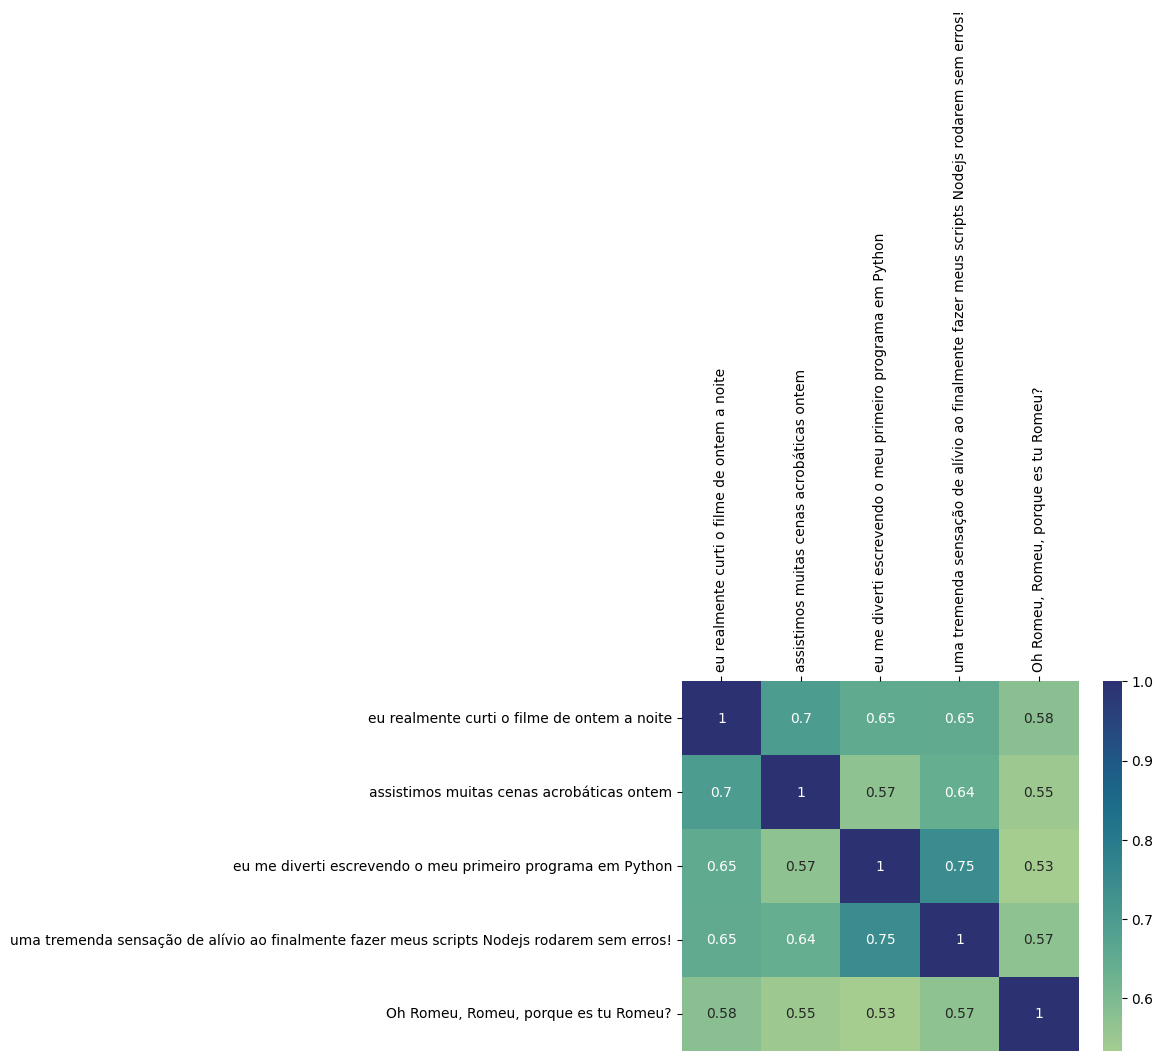

In [29]:
ax = sns.heatmap(df, annot=True, cmap="crest")
ax.xaxis.tick_top()
ax.set_xticklabels(text, rotation=90)